In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

%matplotlib inline

In [3]:
%precision 3

'%.3f'

In [4]:
from sklearn import linear_model

In [5]:
import requests, zipfile
from io import StringIO
import io

In [6]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"

In [7]:
r = requests.get(url, stream=True)

In [9]:
z = zipfile.ZipFile(io.BytesIO(r.content))

In [10]:
z.extractall()

In [11]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt  Untitled.ipynb


In [6]:
student_data = pd.read_csv("student-mat.csv")

In [13]:
student_data.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [7]:
student_data_math = pd.read_csv("student-mat.csv", sep=';')

In [9]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [16]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [10]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


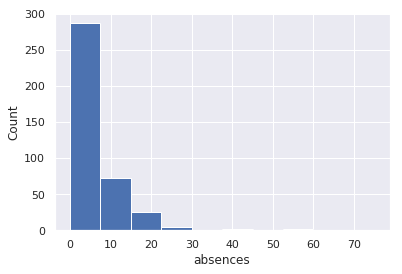

In [11]:
plt.hist(student_data_math['absences'])

plt.xlabel('absences')
plt.ylabel('Count')

plt.grid(True)

In [12]:
print('Mean: ', student_data_math['absences'].mean())
print('Median: ', student_data_math['absences'].median())
print('Mode: ', student_data_math['absences'].mode())

Mean:  5.708860759493671
Median:  4.0
Mode:  0    0
dtype: int64


In [20]:
student_data_math.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [13]:
student_data_math['absences'].var()

64.050

In [14]:
student_data_math['absences'].std()

8.003

In [15]:
np.sqrt(student_data_math['absences'].var())

8.003095687108177

In [16]:
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [18]:

student_data_math['absences'].describe()[6]- student_data_math['absences'].describe()[4]

8.0

In [19]:

student_data_math['absences'].describe()[0]

395.0

In [20]:

student_data_math['absences'].describe()[1]

5.708860759493671

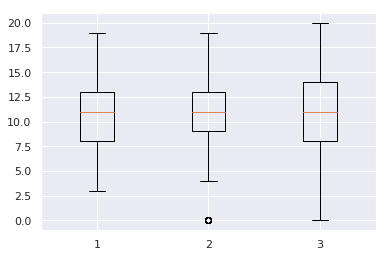

In [22]:
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])

plt.grid(True)

In [23]:
student_data_math['G2'].describe()

count    395.000000
mean      10.713924
std        3.761505
min        0.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64

## cv= sigma / mu

In [24]:
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.402

In [25]:
student_data_math.std() / student_data_math.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

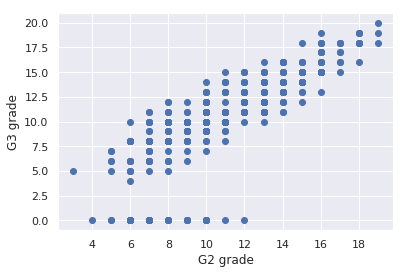

In [27]:
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

plt.ylabel('G3 grade')
plt.xlabel('G2 grade')
plt.grid(True)

In [35]:
X = student_data_math['G1'].values
Y = student_data_math['G3'].values

In [36]:
cov_xy = np.sum((X-np.mean(X))*(Y-np.mean(Y)))

In [37]:
cov_xy /len(X)

12.156827431501362

In [44]:
n1_var_x = np.var(X)

In [46]:
n1_var_y = np.var(Y)

In [43]:
n = len(X)

In [47]:
n1_var_x * (n-1)/n

10.961341329996205

In [49]:
n1_var_y * (n-1)/n

20.883474386407563

In [50]:
np.var(X)

10.989161993270308

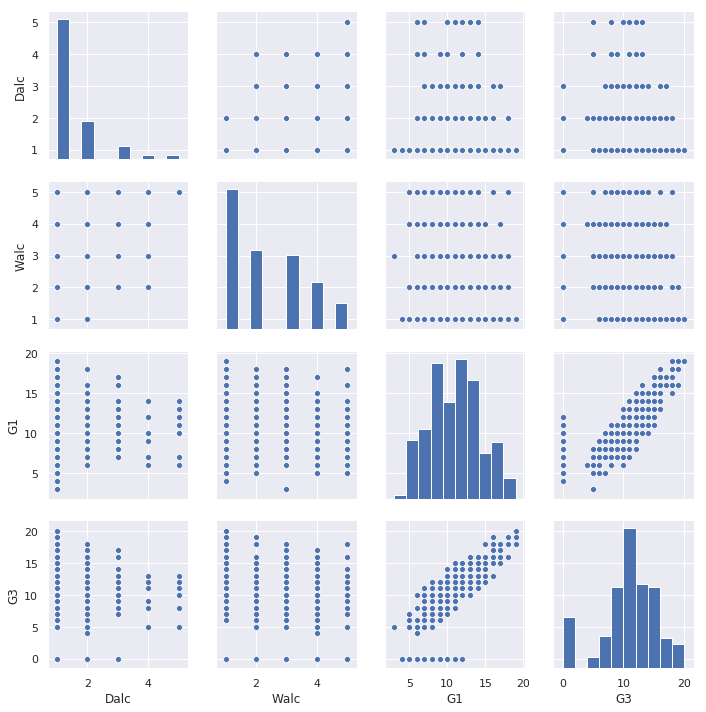

In [52]:
sns.pairplot(student_data_math[['Dalc','Walc', 'G1', 'G3']])
plt.grid(True)

In [53]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

(0.8014679320174141, 9.001430312276602e-90)

In [54]:
ls


student-mat.csv  student-merge.R  student-por.csv  student.txt  Untitled.ipynb


In [57]:
student_prot = pd.read_csv('student-por.csv',sep=';')

In [58]:
student_prot.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [59]:
student_prot.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [60]:
student_prot.merge(student_data_math)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [62]:
student_data_merge = pd.merge(student_data_math,
                             student_prot,
                             on=['school','sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 
                                'Fedu','Mjob', 'Fjob', 'reason', 'nursery', 'internet'],
                             suffixes=('_math','_por'))

In [63]:
student_data_merge.describe()

,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [64]:
student_data_merge.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
